# ¿Qué juego tiene éxito?


Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## 1. Inicialización

In [1]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import math
import seaborn as sns

## Carga de datos

In [2]:
# Carga de datos
df=pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Los datos encontrados muestran 6 columnas con datos ausentes, aun así es necesario estudiar la información de las columnas para cidentificar errores en nombres, valores duplicados, tipos de datos y contar los valores ausentes en cada una de ellas. Por tanto, se presenta la información general de los datos:

In [3]:
# Imprime la información general/resumida sobre el DataFrame
print("=== TABLA GAMES ===")
print("Forma de la tabla:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación general:")
print(df.info())
print("\nValores nulos:")
print(df.isnull().sum())
print("\nValores duplicados:")
print(df.duplicated().sum())
print("\nEstadísticas descriptivas:")
print(df.describe())

=== TABLA GAMES ===
Forma de la tabla: (16715, 11)

Primeras 5 filas:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Información general:
<class 

## 2. Preparación de datos

Los datos presentan mayúsculas y minúsculas en los nombres por lo que se aplica la correccion pasando todas las columnas a minúsculas, incluyendo la revisión de espacios antes, entre y despúes de cada palabra. 

In [4]:
#Corrección de nombres
new_col_names = []

for columns in df:
    stripped=columns.strip()
    lowered=stripped.lower()
    replace=lowered.replace(' ','_')
    new_col_names.append(replace)
df.columns=new_col_names

print('Las columnas son:')
print(df.columns)
print()

Las columnas son:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')



En cuanto a los valores ausentes, las columnas con mayor cantidad son:
'Critic_Score':51.31%
'User_Score':40.08%
'Rating':40.47%
'Year_of_Release':1.60%

Debido a que los porcentajes de datos ausentes son igual o mayor al 40% para las primeras tres columnas nombradas, no se pueden rellenar los datos porque sesgaría el análisis ya que no se estaría trabajando con información real. Los porcentajes de 'rating' y 'user_score' son similares, lo que puede sugerir que los juegos sin puntuación tienen características comunes. 

Por otra parte, los tipos de datos de las columnas 'Year_of_Release' y 'Critic_Score' son float64, aunque deberían ser enteros se dejan igual debido a los valores ausentes presentes en las columnas en el caso de 'Critic_Score'. En el caso de 'Year_of_Release' los datos ausentes representan el 1.60% del total, por lo que se pueden cambiar los NaN por 9999 sin que se sesguen los resultados del análisis, así como cambiar al tipo int en el mismo momento.

In [5]:
#Reemplazo de valores ausentes
df['name']=df['name'].fillna('no info')
df['genre']=df['genre'].fillna('no info')
df['year_of_release']=df['year_of_release'].fillna(9999).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
#Revisión de datos user score para identificar como tratarlos
print('Los valores únicos son:')
print(df['user_score'].unique())
print('\nValores Nan:' , df['user_score'].isna().sum())
print('\nCada puntuación tiene:')
print(df['user_score'].value_counts())

Los valores únicos son:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Valores Nan: 6701

Cada puntuación tiene:
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.7       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


'user_score' tiene 9125 datos entre ausentes y 'tbd' de los 16715 de la columna, es decir, el 54.59% de los datos no cuentan con puntaje, para no sesgar u alterar los resultados de análisis más adelante, se cambia el tipo de dato de object a float usando to_numeric pasando los datos no númericos a NaN.

In [7]:
#Cambiar a float user score, conservando 'tbd' y Nan
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print('Valores NaN: ', df['user_score'].isna().sum())
print('\n Descripción de datos')
print(df.info())
print('\n Estadísticas descriptivas')
print(df.describe())

Valores NaN:  9125

 Descripción de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

 Estadísticas descriptivas
       year_of_release      na_sales      eu_sales      jp_sales  \
count     16715.000000  16715.000000  16715.000000  16715.000000   
mean       2135.1107

## Cálculo de ventas totales

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 3. Análisis de los datos

Para el análisis de los datos se utilizaran dos dataset, uno completo con valores ausentes en los puntajes y otro específico que conserve los juegos con datos completos (sin NaN en user score).

In [9]:
#Para análisis general el dataset completo
df_games = df.copy()

# Para análisis específico el subset sin NaN en user_score
df_with_score = df[df['user_score'].notna()].copy()

print(f"Dataset completo: {len(df_games)} juegos")
print(f"Dataset con user_score: {len(df_with_score)} juegos")

Dataset completo: 16715 juegos
Dataset con user_score: 7590 juegos


-  La cantidad de juegos lanzados por año permiten determinar si los datos por año son suficientes y ¿qué períodos son relevantes para la predicción del 2017?

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
9999     269
Name: year_of_release, dtype: int64


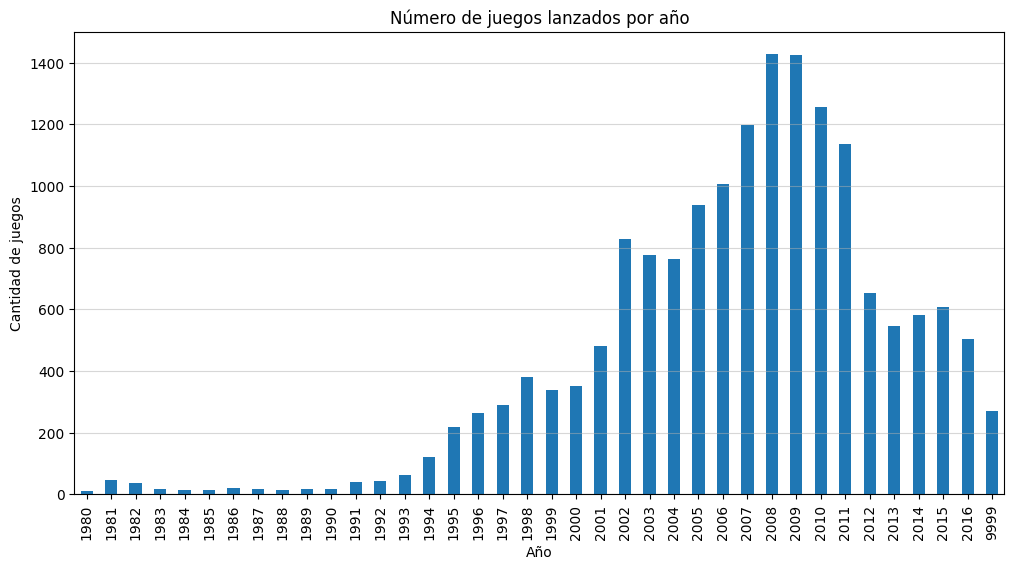

In [10]:
# Contar juegos por año
juegos_por_año = df_games['year_of_release'].value_counts().sort_index()
print(juegos_por_año)

# Visualizar la distribución
juegos_por_año.plot(kind='bar', figsize=(12, 6))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.grid(axis='y', alpha=0.5)

A partir del 2002 incremento la catidad de juegos lanzados por año, disminuyendo un poco entre 2003 y 2004, pero retomando el incremento en 2005 hasta 2009 donde empieza el declive de lanzamientos. En 2016 se cuenta con 502 juegos, número significativo en comparación de 1980 al 2000 pero con menor información que el período del 2002 al 2011. Para los futuros análisis se puede incluir este período con el fin de determinar que caractrísticas tienen y si son datos importantes a tener en cuenta dada la tecnología actual.

- Ventas por plataforma:
  ¿Qué plataformas tienen mayor venta total?
  ¿Cuáles fueron las plataformas más populares?
  ¿Cuánto tiempo duran las plataformas en aparecer y desaparecer?

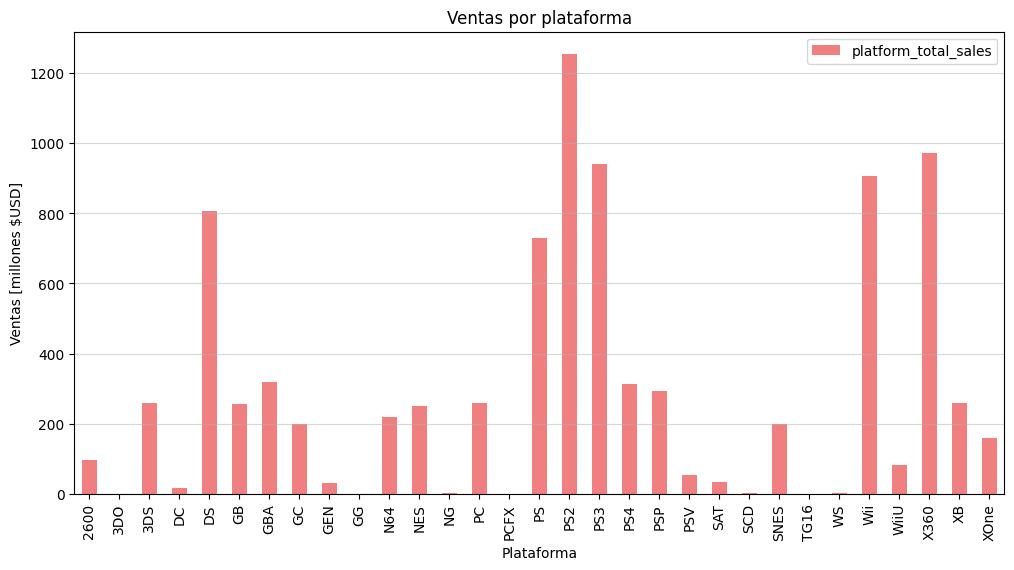

In [11]:
# Contar ventas por plataforma por año
ventas_por_plataforma = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index(name='platform_sales')

# Ventas totales por plataforma

ventas_totales_por_plataforma=ventas_por_plataforma.groupby(['platform'])['platform_sales'].sum().reset_index(name='platform_total_sales')


# Visualizar la distribución
ventas_totales_por_plataforma.plot(kind='bar',x='platform', figsize=(12, 6), color='lightcoral')
plt.title('Ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas [millones $USD]')
plt.grid(axis='y', alpha=0.5)

Analizaremos por año las plataformas con mayores ventas totales.

In [12]:
plataformas_populares = ventas_totales_por_plataforma[ventas_totales_por_plataforma['platform_total_sales'] > 600].sort_values('platform_total_sales')
plataformas_populares

,platform,platform_total_sales
15,PS,730.86
4,DS,806.12
26,Wii,907.51
17,PS3,939.65
28,X360,971.42
16,PS2,1255.77


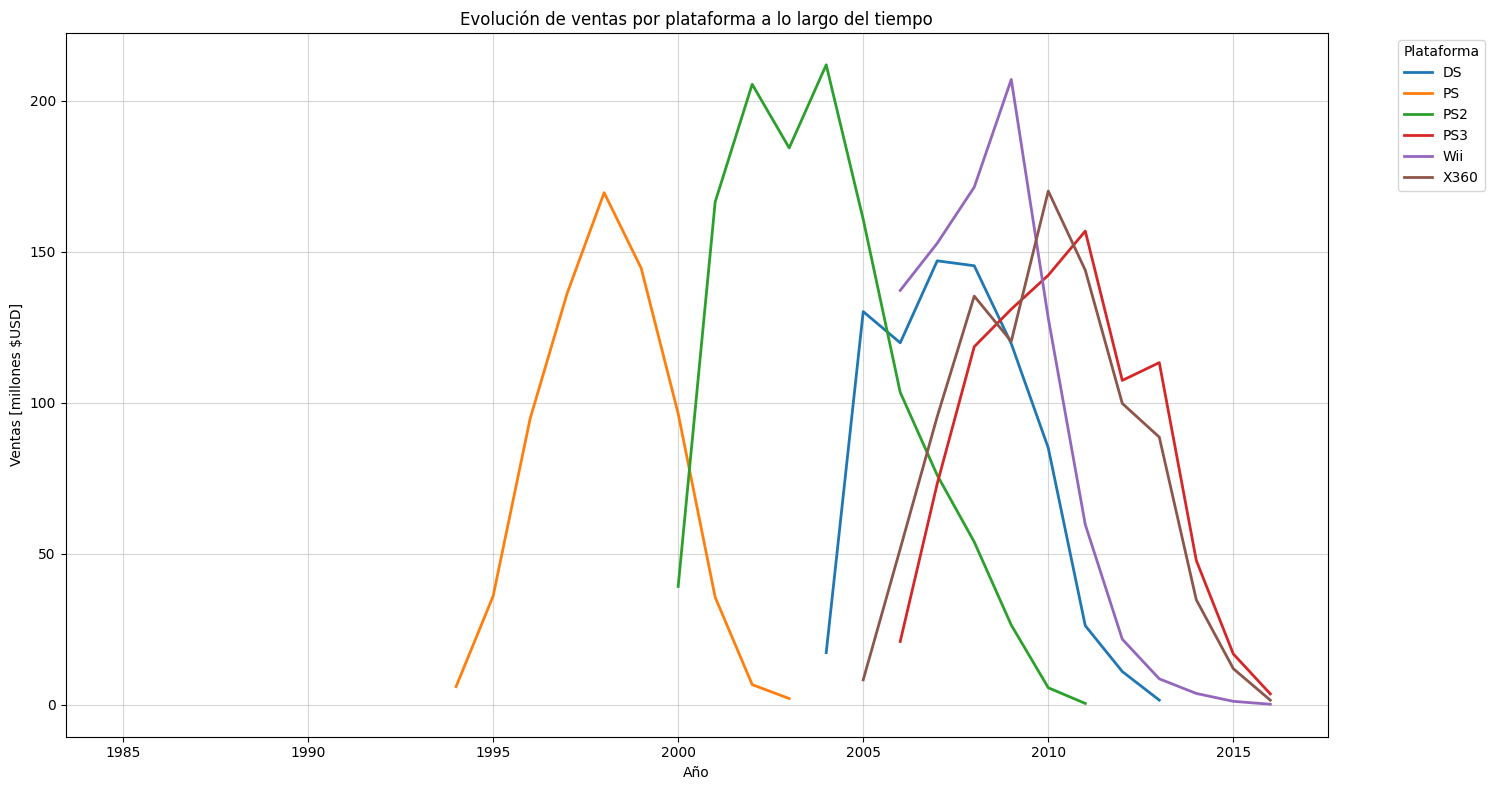

In [13]:
#Ventas por año de las plataformas más populares
ventas_populares=ventas_por_plataforma[ventas_por_plataforma['platform'].isin(plataformas_populares['platform'])]
ventas_populares_filtradas = ventas_populares[ventas_populares['year_of_release'] != 9999]

# Crear un pivot para mejor visualización
pivot_ventas = ventas_populares_filtradas.pivot(index='year_of_release', columns='platform', values='platform_sales')

# Visualizar como líneas para ver los ciclos de vida
pivot_ventas.plot(kind='line', figsize=(15, 8), linewidth=2)
plt.title('Evolución de ventas por plataforma a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas [millones $USD]')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Las plataformas DS, Wii, X360 y PS3 aparecen en el mercado casi al mismo tiempo, en años muy cercanos mientras que PS y PS2 iniciaron sin competencia, en el caso de PS2 se puede observar que al aparecer una nueva plataforma antes del 2005 empiezan a bajar sus ventas hasta desaparecer despues del 2010. Esto indica que tienen cerca de 10 años de permanencia en el mercado y antes del año 5 inicia el declive. 

- Los datos son relevantes estan después del 2005, que donde se tienen más juegos, mayor cantidad de plataformas y mayor competencia en el mercado. Por tanto, se tomara el período del 2005 al 2016 para el pronóstico del 2017.

In [14]:
ventas_2005_adelante = ventas_por_plataforma[ventas_por_plataforma['year_of_release'] >= 2005]
nuevas_plataformas_populares = ventas_2005_adelante.groupby(['platform'])['platform_sales'].sum().reset_index(name='platform_total_sales')
nuevas_plataformas_populares = nuevas_plataformas_populares.sort_values('platform_total_sales')
nuevas_plataformas_populares

,platform,platform_total_sales
2,DC,0.06
7,N64,0.67
4,GB,1.03
9,PS,3.28
0,2600,10.50
6,GC,41.35
5,GBA,47.51
14,PSV,54.07
18,XB,66.02
16,WiiU,82.19


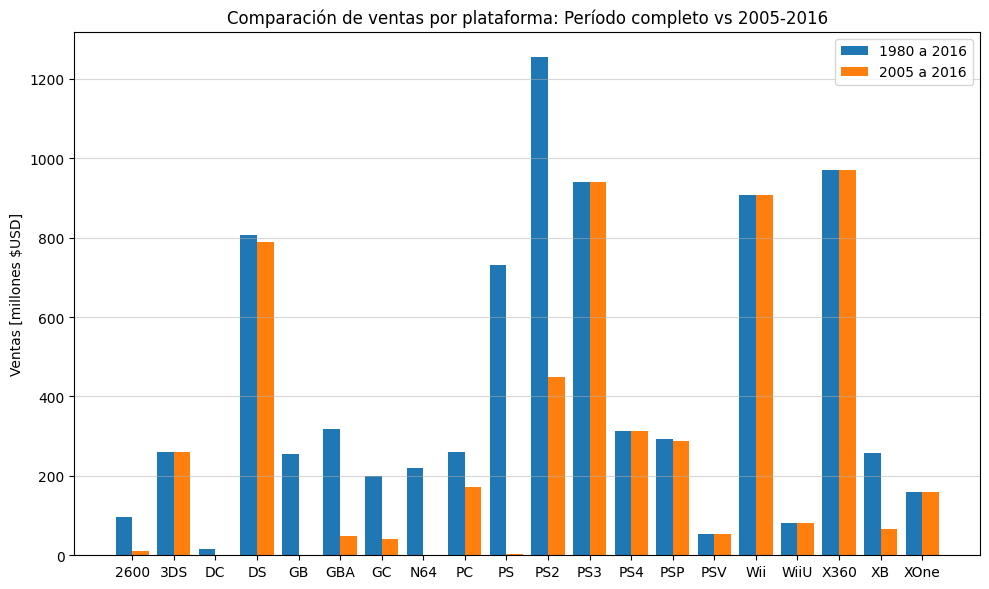

In [15]:
# Visualizar la distribución de ventas por plataforma
nuevas_ventas_populares=ventas_totales_por_plataforma[ventas_totales_por_plataforma['platform'].isin(nuevas_plataformas_populares['platform'])]

nuevas_ventas_populares=nuevas_ventas_populares.sort_values('platform')
nuevas_plataformas_populares=nuevas_plataformas_populares.sort_values('platform')

w, x = 0.4, np.arange(len(nuevas_plataformas_populares['platform'].values))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - w/2, nuevas_ventas_populares['platform_total_sales'], width=w, label='1980 a 2016')
ax.bar(x + w/2, nuevas_plataformas_populares['platform_total_sales'], width=w, label='2005 a 2016')

ax.set_xticks(x)
ax.set_xticklabels(nuevas_plataformas_populares['platform'])
ax.set_ylabel('Ventas [millones $USD]')
ax.set_title('Comparación de ventas por plataforma: Período completo vs 2005-2016')
ax.grid(axis='y', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

Las plataformas líderes en ventas son X360, PS3, Wii y DS puesto que son plataformas lanzadas alrededor del 2005 o posterior, mientras que PS tuvo grandes ventas en la historía es de las plataformas que menos vendió después del 2005, es decir, es tecnología obsoleta.

In [16]:
#Filtro de Dataset a los datos relevantes
df_games = df_games[df_games['year_of_release'] >= 2005]
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11541 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11541 non-null  object 
 1   platform         11541 non-null  object 
 2   year_of_release  11541 non-null  int64  
 3   genre            11541 non-null  object 
 4   na_sales         11541 non-null  float64
 5   eu_sales         11541 non-null  float64
 6   jp_sales         11541 non-null  float64
 7   other_sales      11541 non-null  float64
 8   critic_score     5799 non-null   float64
 9   user_score       5665 non-null   float64
 10  rating           7491 non-null   object 
 11  total_sales      11541 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.1+ MB


- Las ventas globales de todos los juegos por plataforma se presenta a continuación.

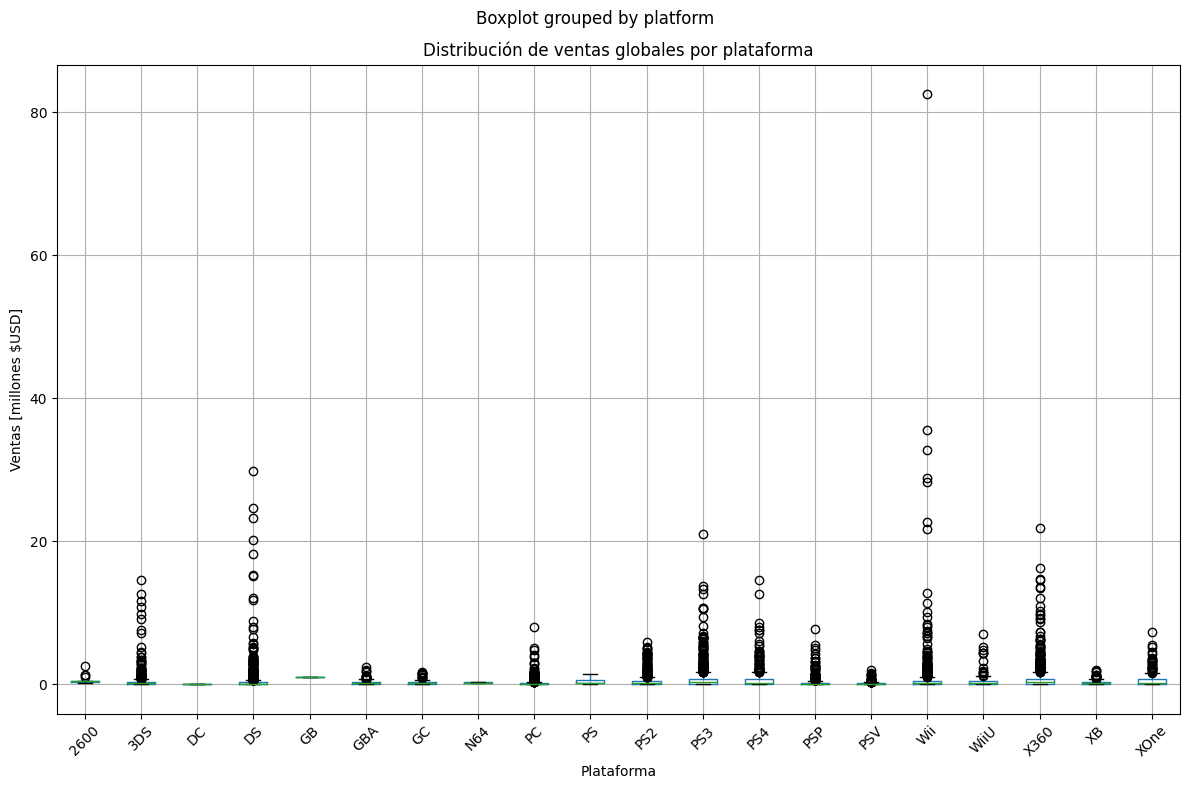

In [17]:
plt.figure(figsize=(12, 8))
df_games.boxplot(column='total_sales', by='platform', ax=plt.gca())
plt.title('Distribución de ventas globales por plataforma')
plt.ylabel('Ventas [millones $USD]')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:

# Estadísticas por plataforma
stats_por_plataforma = df_games.groupby('platform')['total_sales'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
stats_por_plataforma['difference'] = stats_por_plataforma['mean'] - stats_por_plataforma['median']
print(stats_por_plataforma.sort_values('median', ascending=False))


          count  mean  median   std   min    max  difference
platform                                                    
GB            1  1.03    1.03   NaN  1.03   1.03        0.00
2600         17  0.62    0.44  0.60  0.15   2.53        0.18
X360       1262  0.77    0.28  1.62  0.01  21.82        0.49
PS3        1331  0.71    0.27  1.39  0.00  21.05        0.44
WiiU        147  0.56    0.22  1.06  0.01   7.09        0.34
XOne        247  0.65    0.22  1.04  0.01   7.39        0.43
N64           3  0.22    0.20  0.10  0.14   0.33        0.02
PS4         392  0.80    0.20  1.61  0.01  14.63        0.60
Wii        1320  0.69    0.19  3.13  0.01  82.54        0.50
PS            7  0.47    0.18  0.56  0.04   1.46        0.29
PS2        1099  0.41    0.17  0.72  0.00   5.95        0.24
GC          155  0.27    0.15  0.34  0.01   1.68        0.12
3DS         520  0.50    0.12  1.43  0.01  14.60        0.38
GBA         191  0.25    0.12  0.36  0.01   2.40        0.13
XB          266  0.25   

- ¿Son significativas las diferencias en las ventas?

El diagrama de caja muestra gran dispersión en los datos, especialmente en la cantidad de datos atípicos. Indicando que se tiene una distibución asimétrica, es decir, la mayoría de los juegos tienen ventas moderadas o bajas, mientras que pocos juegos tienen ventas extraordinarias o son exitosos. Por lo que se puede afirmar, que sí son significativas las diferencias en las ventas.


- ¿Qué sucede con las ventas promedio en varias plataformas?

La mayoría presenta diferencia significativa entre media y mediana confirmando que son pocos los juegos con ventas altas. Teniendo en cuenta, que la mediana es menor a la media, se puede decir que hay mayor posibilidad de ventas modestas que de ventas altas. 

Las estadísticas nos indican que la plataforma GB, presentan la mayor diferencia entre la mediana y la media, así como el mayor valor de la mediana. Lo que representa un alto riesgo de inversión en este tipo de plataformas, porque son pocos los juegos que generan ventas altas y las ganancias se concentran en ellos. 


- ¿Cómo afectan las reseñas a las ventas de una plataforma?

Para el ejemplo se toman los datos de PS3 que es una de las plataformas con mayor venta, con el fin de conocer la correlación entre las reseñas y las ventas.

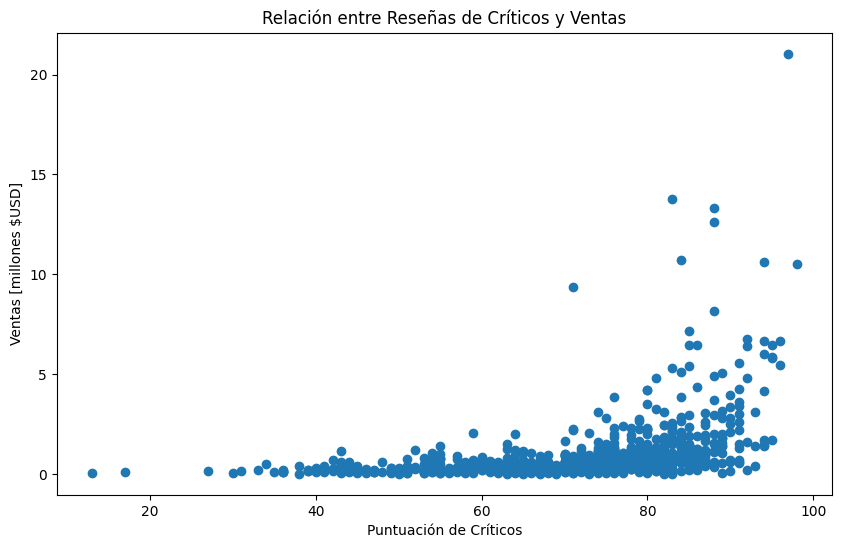

Correlación: 0.432


In [34]:
df_ps3 = df_games[df_games['platform'] == 'PS3'].copy()

plt.figure(figsize=(10, 6))
plt.scatter(df_ps3['critic_score'], df_ps3['total_sales'])
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas [millones $USD]')
plt.title('Relación entre Reseñas de Críticos y Ventas')
plt.show()

correlacion = df_ps3['critic_score'].corr(df_ps3['total_sales'])
print(f"Correlación: {correlacion:.3f}")

La gráfica de dispersión indica que hay tendencia positiva entre las reseñas y las ventas, la cual se confirma con la correlación de 0.43. Esto indica que tienen una relación con tendecia positiva, es decir, que una buena reseña puede ayudar a tener una venta mas alta.

- Ventas de los juegos multiplataformas

In [20]:
games_sales=df_games.groupby(['name','platform'])['total_sales'].sum().reset_index(name='games_sales')
games_platform=games_sales['name'].value_counts().sort_index()
juegos_multiplataforma=games_platform[games_platform >= 2].index
ventas_multiplataformas = games_sales[games_sales['name'].isin(juegos_multiplataforma)]
ventas_multiplataformas

,name,platform,games_sales
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
12,007: Quantum of Solace,DS,0.13
13,007: Quantum of Solace,PC,0.02
14,007: Quantum of Solace,PS2,0.43
...,...,...,...
11525,pro evolution soccer 2011,PSP,0.80
11526,pro evolution soccer 2011,Wii,0.22
11527,pro evolution soccer 2011,X360,0.60
11533,uDraw Studio: Instant Artist,Wii,0.17


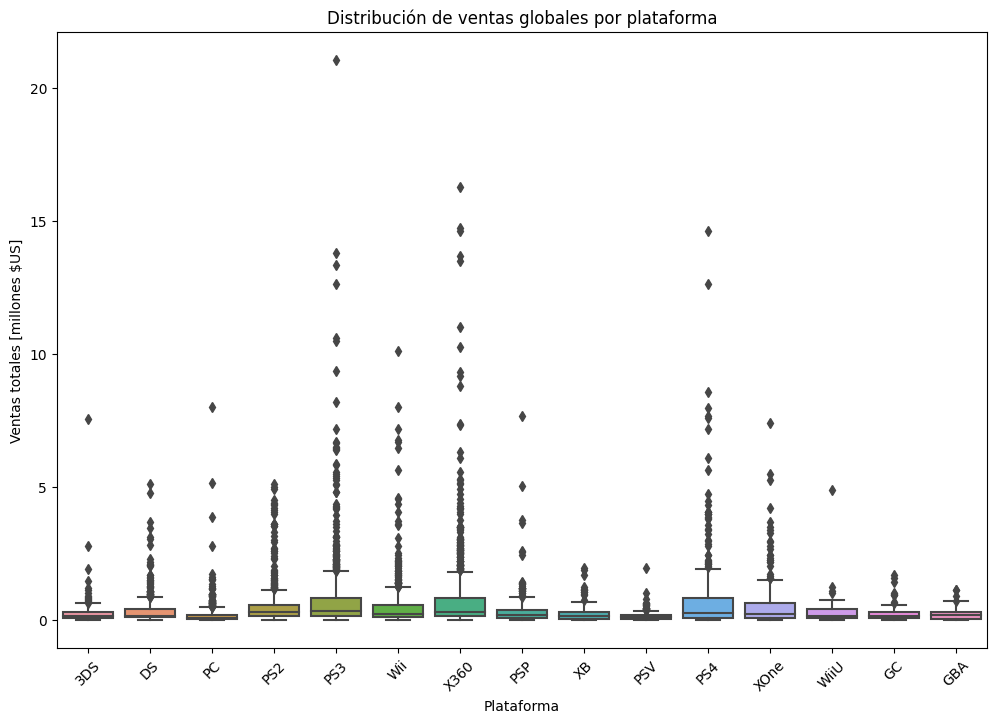

In [21]:
# Comparación de ventas de juegos por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(data=ventas_multiplataformas, x='platform', y='games_sales')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales [millones $US]')
plt.show()

In [22]:
# Estadísticas por plataforma de juegos multiplataforma
stats_multiplataforma = ventas_multiplataformas.groupby('platform')['games_sales'].describe()
stats_multiplataforma['coef_var']=stats_multiplataforma['std']/stats_multiplataforma['mean']
print(stats_multiplataforma.sort_values('coef_var'))

           count      mean       std   min     25%   50%     75%    max  \
platform                                                                  
GBA         52.0  0.246923  0.275286  0.01  0.0475  0.17  0.3100   1.14   
GC         120.0  0.241417  0.287567  0.01  0.0800  0.15  0.2900   1.68   
XB         191.0  0.250105  0.319747  0.01  0.0500  0.13  0.3100   1.96   
PSV        204.0  0.150833  0.200565  0.01  0.0500  0.09  0.1725   1.96   
PS2        543.0  0.544291  0.810198  0.00  0.1300  0.29  0.5450   5.12   
DS         521.0  0.348004  0.542977  0.01  0.0900  0.16  0.4000   5.09   
XOne       224.0  0.603080  1.006972  0.01  0.0575  0.22  0.6450   7.39   
WiiU        99.0  0.302424  0.531976  0.01  0.0550  0.15  0.4000   4.87   
Wii        681.0  0.512643  0.921420  0.01  0.1000  0.23  0.5500  10.12   
PSP        377.0  0.345279  0.626940  0.01  0.0700  0.18  0.3800   7.68   
X360      1011.0  0.785915  1.497623  0.01  0.1300  0.31  0.8050  16.27   
PS3       1045.0  0.74986

Las plataformas PS3, X360, PS4 y Wii tienen la mediana mas grande de los juegos multiplataforma, estos también tienen mayor variabilidad en sus ventas y valores atípicos significativos.

Por otro lado, las plataformas GBA, GC,XB,PSV y PS2 con juegos multiplataforma tiene mayor predictibilidad en sus ventas debido a que su coeficiente de variación es mas pequeño. Mientras que los de mayor mediana pueden ser menos predecibles.

- Ventas de juegos por género:
  ¿Cuáles son los géneros más rentables?
  ¿Qué géneros tienen mayor o menor venta?

Ventas totales por género:
genre
Action          1229.69
Sports           874.94
Shooter          769.65
Misc             628.05
Role-Playing     554.26
Racing           360.21
Platform         305.28
Simulation       271.63
Fighting         212.94
Adventure        154.07
Puzzle           112.96
Strategy          80.08
Name: total_sales, dtype: float64

 Cantidad de juegos por género:
Action          2636
Sports          1425
Misc            1397
Role-Playing    1084
Adventure       1075
Shooter          860
Racing           661
Simulation       660
Fighting         468
Platform         433
Strategy         432
Puzzle           410
Name: genre, dtype: int64


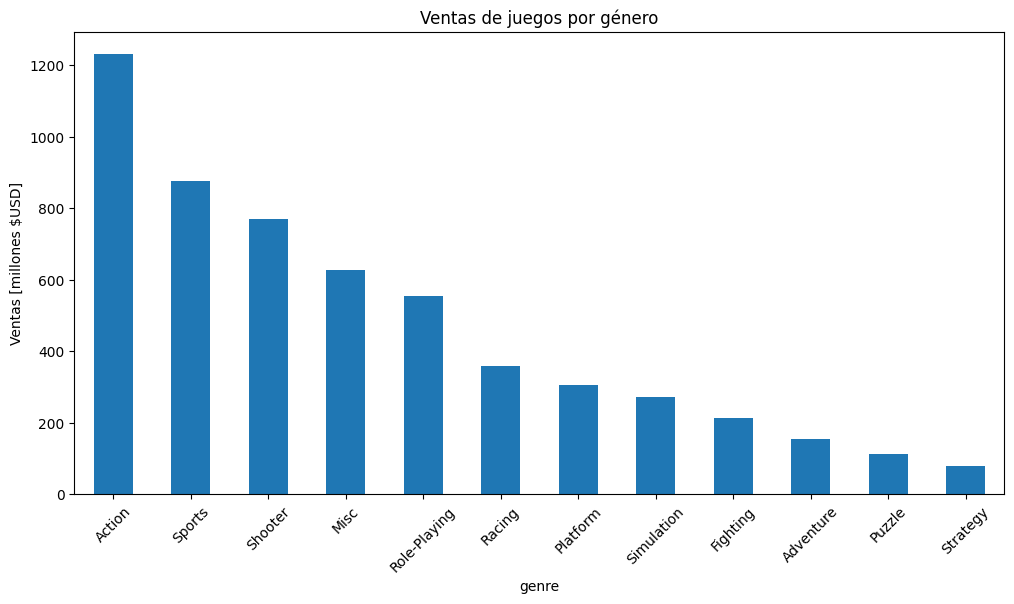

Correlación: 0.871


In [29]:
# Ventas totales por género
ventas_genero=df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por género:")
print(ventas_genero)

# Contar juegos por género
juegos_por_genero = df_games['genre'].value_counts()
print("\n Cantidad de juegos por género:")
print(juegos_por_genero)

# Visualizar
plt.figure(figsize=(12, 6))
ventas_genero.plot(kind='bar')
plt.title('Ventas de juegos por género')
plt.ylabel('Ventas [millones $USD]')
plt.xticks(rotation=45)
plt.show()

correlacion_genero = juegos_por_genero.corr(ventas_genero)
print(f"Correlación: {correlacion_genero:.3f}")

Los géneros con mayor cantidad de juegos son:Action, Sports, Misc, Role-Playing, Adventure. Mientras que las ventas indican que los géneros más rentables son: Action, Sports, Shooter, Misc, Role-Playing. 

En base a lo anterior, se puede decir que en la mayoría de los casos, los géneros con mayor cantidad de juegos son los que tiene más ventas, a excepción de Adventure que cuénta con gran cantidad de juegos pero tiene ventas bajas a nivel global. La correlación entre las ventas y la cantidad de juegos por género es de 0.87, confirmando que tiene una correlación de tendencia positiva. 

## 4. Perfil de usuario por región

- Variación en cuotas de mercado por región de las cinco plataformas principales 

In [24]:

# Para Norteamérica (NA)
na_platforms = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_platforms_top=na_platforms.head(5)

print('Las 5 plataformas principales para NA:')
print(na_platforms_top)


# Para Europa (EU) 
eu_platforms = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_platforms_top=eu_platforms.head(5)
print('\n Las 5 plataformas principales para EU:')
print(eu_platforms_top)

# Para Japón (JP)
jp_platforms = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_platforms_top=jp_platforms.head(5)
print('\n Las 5 plataformas principales para JP:')
print(jp_platforms_top)

Las 5 plataformas principales para NA:
platform
X360    602.47
Wii     496.90
PS3     393.49
DS      374.07
PS2     211.41
Name: na_sales, dtype: float64

 Las 5 plataformas principales para EU:
platform
PS3     330.29
X360    270.76
Wii     262.21
DS      184.96
PS4     141.09
Name: eu_sales, dtype: float64

 Las 5 plataformas principales para JP:
platform
DS     171.90
3DS    100.67
PS3     80.19
PSP     74.75
Wii     69.33
Name: jp_sales, dtype: float64


In [25]:
# Cuotas de mercado por región

# Para Norteamérica (NA)
total_na_sales = df_games['na_sales'].sum()
na_market_share = (na_platforms_top / total_na_sales) * 100
print('Las cuotas de mercado de NA:')
print(na_market_share)


# Para Europa (EU) 
total_eu_sales = df_games['eu_sales'].sum()
eu_market_share = (eu_platforms_top / total_eu_sales) * 100
print('\n Las cuotas de mercado de EU:')
print(eu_market_share)


# Para Japón (JP)
total_jp_sales = df_games['jp_sales'].sum()
jp_market_share = (jp_platforms_top / total_jp_sales) * 100
print('\n Las cuotas de mercado de JP:')
print(jp_market_share)

Las cuotas de mercado de NA:
platform
X360    22.413569
Wii     18.486069
PS3     14.638928
DS      13.916450
PS2      7.865043
Name: na_sales, dtype: float64

 Las cuotas de mercado de EU:
platform
PS3     20.120373
X360    16.493966
Wii     15.973123
DS      11.267262
PS4      8.594821
Name: eu_sales, dtype: float64

 Las cuotas de mercado de JP:
platform
DS     27.624221
3DS    16.177605
PS3    12.886482
PSP    12.012277
Wii    11.141287
Name: jp_sales, dtype: float64


Describe las variaciones en sus cuotas de mercado de una región a otra.

Se obtiene que Norteamérica y Europa tienen preferencias similares en cuanto a las plataformas más vendidas como lo son PS3,X360,Wii y DS aunque en NA se vende más PS2 mientras que en EU PS4. Por otra parte, Japón varia un poco más en las plataformas tomando con mayor cuota en el mercado DS. Se puede observar que DS, PS3 y Wii son plataformas que se encuentran en el top 5 de más vendidas en las diferentes regiones.

- Los cinco géneros principales

In [26]:
# Para Norteamérica (NA)
na_genres = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genres_top=na_genres.head(5)

print('Los 5 géneros principales para NA:')
print(na_genres_top)


# Para Europa (EU) 
eu_genres = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genres_top=eu_genres.head(5)
print('\n Los 5 géneros  principales para EU:')
print(eu_genres_top)

# Para Japón (JP)
jp_genres = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genres_top=jp_genres.head(5)
print('\n Los 5 géneros principales para JP:')
print(jp_genres_top)

Los 5 géneros principales para NA:
genre
Action          595.88
Sports          445.93
Shooter         408.37
Misc            319.52
Role-Playing    212.62
Name: na_sales, dtype: float64

 Los 5 géneros  principales para EU:
genre
Action     380.72
Sports     271.07
Shooter    250.89
Misc       169.23
Racing     131.07
Name: eu_sales, dtype: float64

 Los 5 géneros principales para JP:
genre
Role-Playing    181.62
Action          109.68
Misc             73.58
Sports           53.12
Platform         36.44
Name: jp_sales, dtype: float64


In [27]:
# Cuotas de mercado por región

# Para Norteamérica (NA)
na_genre_share = (na_genres_top / total_na_sales) * 100
print('Las cuotas de mercado por género de NA:')
print(na_genre_share)


# Para Europa (EU) 
eu_genre_share = (eu_genres_top / total_eu_sales) * 100
print('\n Las cuotas de mercado por género de EU:')
print(eu_genre_share)


# Para Japón (JP)
jp_genre_share = (jp_genres_top / total_jp_sales) * 100
print('\n Las cuotas de mercado por género de JP:')
print(jp_genre_share)

Las cuotas de mercado por género de NA:
genre
Action          22.168402
Sports          16.589843
Shooter         15.192506
Misc            11.887037
Role-Playing     7.910059
Name: na_sales, dtype: float64

 Las cuotas de mercado por género de EU:
genre
Action     23.192432
Sports     16.512851
Shooter    15.283540
Misc       10.309033
Racing      7.984430
Name: eu_sales, dtype: float64

 Las cuotas de mercado por género de JP:
genre
Role-Playing    29.186218
Action          17.625506
Misc            11.824259
Sports           8.536350
Platform         5.855885
Name: jp_sales, dtype: float64


En cuanto a las preferencias por género se encontró que NA y EU tienen mucha similidad aunque diferencian en un género, el de menor preferencia en el tp , para NA es Role-Playing mientras que EU prefiere Racing.

En el caso de Japón sus preferencias varian de las otras regiones posiblemente por afinidad a su cultura, prefieren géneros como Role-Playing y platform. Las regiones tienen en común que en sus preferencias estan Action, Misc y Sports los cuales hacen parte de los géneros más rentab

- Clasificación de ESRB vs Ventas por región

In [38]:
# Ver las clasificaciones disponibles
rating = df_games['rating'].value_counts()
print("Clasificaciones ESRB disponibles:")
print(rating)

# Ver cuántos juegos tienen rating
print(f"\nJuegos con rating: {df_games['rating'].notna().sum()}")
print(f"Juegos sin rating: {df_games['rating'].isna().sum()}")

# Ventas por rating en cada región
ventas_por_rating = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(f"\n Ventas por rating:")
print(ventas_por_rating)

Clasificaciones ESRB disponibles:
E       2742
T       2069
E10+    1406
M       1262
EC         8
RP         3
AO         1
Name: rating, dtype: int64

Juegos con rating: 7491
Juegos sin rating: 4050

 Ventas por rating:
        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E         891.85    515.09    147.48
E10+      350.84    187.09     39.05
EC          1.53      0.11      0.00
M         612.93    418.08     46.89
RP          0.00      0.08      0.00
T         491.23    263.41     92.02


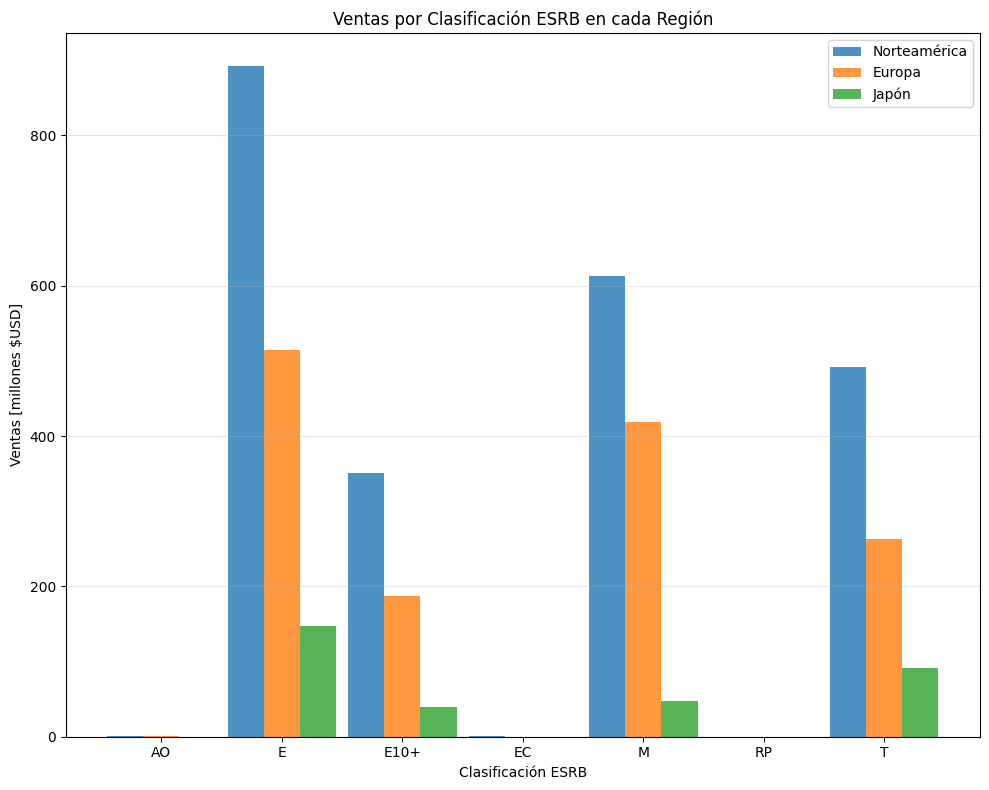

In [41]:
# Gráfico de barras para comparar
ratings=ventas_por_rating.index

plt.figure(figsize=(10, 8))
x = np.arange(len(ratings))
width= 0.3

plt.bar(x-width, ventas_por_rating['na_sales'], width, label='Norteamérica', alpha=0.8 )
plt.bar(x, ventas_por_rating['eu_sales'], width, label='Europa', alpha=0.8 )
plt.bar(x+width, ventas_por_rating['jp_sales'], width, label='Japón', alpha=0.8 )

plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas [millones $USD]')
plt.title('Ventas por Clasificación ESRB en cada Región')
plt.xticks(x, ratings)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

El gráfico de barras indica que las ventas varian según la clasificación, aunque un patrón común es que Norteamérica es la región con mayor consumo. Es relevante mencionar que son cuatro las clasificaciones con ventas altas E,M, T y E10+.

## 5. Prueba de hipótesis

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.



Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas


Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


Nivel de significancia (α): 0.05

In [1]:
# Filtrar datos para Xbox One y PC con user_score disponible
xbox_scores = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'].notna())]['user_score']
pc_scores = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'].notna())]['user_score']

print(f"Xbox One - Juegos con puntuación: {len(xbox_scores)}")
print(f"PC - Juegos con puntuación: {len(pc_scores)}")

# Calcular promedios y estadísticas
xbox_mean = xbox_scores.mean()
pc_mean = pc_scores.mean()

print(f"\nPromedio Xbox One: {xbox_mean:.3f}")
print(f"Promedio PC: {pc_mean:.3f}")
print(f"Diferencia: {abs(xbox_mean - pc_mean):.3f}")

# Estadísticas adicionales
print(f"\nXbox One - Mediana: {xbox_scores.median():.3f}, Desv. estándar: {xbox_scores.std():.3f}")
print(f"PC - Mediana: {pc_scores.median():.3f}, Desv. estándar: {pc_scores.std():.3f}")

NameError: name 'df_games' is not defined


Antes de realizar la prueba de hipótesis es necesario realizar la prueba de Levene para evaluar la igualdad de varianzas, esto garantizará que la prueba t sea estadísticamente valida.

Prueba de Levene:

H₀: Las varianzas de Xbox One y PC son iguales

H₁: Las varianzas son diferentes 

Nivel de significancia (α): 0.05

In [ ]:
# Aplicar la prueba de Levene
levene_stat, levene_p = st.levene(xbox_scores, pc_scores)
alpha = 0.05

print("=== PRUEBA DE LEVENE ===")
print(f"Hipótesis Nula (H₀): Las varianzas son iguales")
print(f"Hipótesis Alternativa (H₁): Las varianzas son diferentes")
print(f"Nivel de significancia (α): 0.05")
print(f"\nResultados:")
print(f"Estadístico de Levene: {levene_stat:.3f}")
print(f"Valor p: {levene_p:.3f}")

# Interpretación
if levene_p > alpha:
    print(f"\nCONCLUSIÓN: No rechazamos H₀")
    print(f"Las varianzas son iguales - Podemos usar prueba t estándar")
    varianzas_iguales = True
else:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print(f"Las varianzas son diferentes - Usar prueba t de Welch")
    varianzas_iguales = False


=== PRUEBA DE LEVENE ===
Hipótesis Nula (H₀): Las varianzas son iguales
Hipótesis Alternativa (H₁): Las varianzas son diferentes
Nivel de significancia (α): 0.05

Resultados:
Estadístico de Levene: 1.455
Valor p: 0.228

CONCLUSIÓN: No rechazamos H₀
Las varianzas son iguales - Podemos usar prueba t estándar


In [ ]:
# Aplicar la prueba t apropiada según el resultado de Levene
if varianzas_iguales:
    # Usar prueba t estándar (equal_var=True)
    t_stat, t_p = st.ttest_ind(xbox_scores, pc_scores, equal_var=True)
    print("\nUsando prueba t de Student estándar")
else:
    # Usar prueba t de Welch (equal_var=False)
    t_stat, t_p = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)
    print("\nUsando prueba t de Welch (varianzas desiguales)")

print("=== PRUEBA DE HIPÓTESIS ===")
print(f"Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas")
print(f"Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nResultados:")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {t_p}")

if t_p < alpha:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print(f"Existe suficiente evidencia estadística de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC  son diferentes")
else:
    print(f"\nCONCLUSIÓN: No rechazamos H₀") 
    print(f"No hay evidencia suficiente de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC sean diferentes")



Usando prueba t de Student estándar
=== PRUEBA DE HIPÓTESIS ===
Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes
Nivel de significancia (α): 0.05

Resultados:
Estadístico t: -2.923
Valor p: 0.003558489386642234

CONCLUSIÓN: Rechazamos H₀
Existe suficiente evidencia estadística de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC  son diferentes


- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Nivel de significancia (α): 0.05

In [ ]:
# Filtrar datos para géneros de Acción y Deportes con user_score disponible
action_scores = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'].notna())]['user_score']
sports_scores = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'].notna())]['user_score']

print(f"Acción - Juegos con puntuación: {len(action_scores)}")
print(f"Deportes - Juegos con puntuación: {len(sports_scores)}")

# Calcular estadísticas descriptivas
action_mean = action_scores.mean()
sports_mean = sports_scores.mean()

print(f"\nPromedio Acción: {action_mean:.3f}")
print(f"Promedio Deportes: {sports_mean:.3f}")
print(f"Diferencia: {abs(action_mean - sports_mean):.3f}")

print(f"\nAcción - Mediana: {action_scores.median():.3f}, Desv. estándar: {action_scores.std():.3f}")
print(f"Deportes - Mediana: {sports_scores.median():.3f}, Desv. estándar: {sports_scores.std():.3f}")


Acción - Juegos con puntuación: 1497
Deportes - Juegos con puntuación: 779

Promedio Acción: 6.945
Promedio Deportes: 6.565
Diferencia: 0.380

Acción - Mediana: 7.200, Desv. estándar: 1.370
Deportes - Mediana: 6.900, Desv. estándar: 1.633



Prueba de Levene:

H₀: Las varianzas de los géneros de Acción y Deportes son iguales

H₁: Las varianzas son diferentes

Nivel de significancia (α): 0.05

In [ ]:
# Aplicar la prueba de Levene
levene_stat, levene_p = st.levene(action_scores, sports_scores)
alpha = 0.05

print("=== PRUEBA DE LEVENE ===")
print(f"Hipótesis Nula (H₀): Las varianzas son iguales")
print(f"Hipótesis Alternativa (H₁): Las varianzas son diferentes")
print(f"Nivel de significancia (α): 0.05")
print(f"\nResultados:")
print(f"Estadístico de Levene: {levene_stat:.3f}")
print(f"Valor p: {levene_p:.3f}")

# Interpretación
if levene_p > alpha:
    print(f"\nCONCLUSIÓN: No rechazamos H₀")
    print(f"Las varianzas son iguales - Podemos usar prueba t estándar")
    varianzas_iguales = True
else:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print(f"Las varianzas son diferentes - Usar prueba t de Welch")
    varianzas_iguales = False

=== PRUEBA DE LEVENE ===
Hipótesis Nula (H₀): Las varianzas son iguales
Hipótesis Alternativa (H₁): Las varianzas son diferentes
Nivel de significancia (α): 0.05

Resultados:
Estadístico de Levene: 23.846
Valor p: 0.000

CONCLUSIÓN: Rechazamos H₀
Las varianzas son diferentes - Usar prueba t de Welch


In [ ]:
# Aplicar la prueba t apropiada según el resultado de Levene
if varianzas_iguales:
    # Usar prueba t estándar (equal_var=True)
    t_stat, t_p = st.ttest_ind(action_scores, sports_scores, equal_var=True)
    print("\nUsando prueba t de Student estándar")
else:
    # Usar prueba t de Welch (equal_var=False)
    t_stat, t_p = st.ttest_ind(action_scores, sports_scores, equal_var=False)
    print("\nUsando prueba t de Welch (varianzas desiguales)")

print("=== PRUEBA DE HIPÓTESIS ===")
print(f"Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas")
print(f"Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nResultados:")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {t_p}")

if t_p < alpha:
    print(f"\nCONCLUSIÓN: Rechazamos H₀")
    print(f"Las calificaciones promedio SÍ son diferentes")
    if action_mean > sports_mean:
        print("Los juegos de Acción tienen calificaciones más altas")
    else:
        print("Los juegos de Deportes tienen calificaciones más altas")
else:
    print(f"\nCONCLUSIÓN: No rechazamos H₀") 
    print(f"No hay evidencia de diferencia significativa")



Usando prueba t de Welch (varianzas desiguales)
=== PRUEBA DE HIPÓTESIS ===
Hipótesis Nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas
Hipótesis Alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
Nivel de significancia (α): 0.05

Resultados:
Estadístico t: 5.552
Valor p: 3.4013241253574284e-08

CONCLUSIÓN: Rechazamos H₀
Las calificaciones promedio SÍ son diferentes
Los juegos de Acción tienen calificaciones más altas


En las pruebas de hipótesis probadas se estableció como nivel de significancia (alpha) igual a 0.05 para comprobar si se rechazaba o no las hipótesis nulas planteadas. En este proyecto se plantean dos sobre las calificaciones promedio: si dos plataformas Xbox One y PC son iguales para la primer prueba y la segunda prueba es sobre si los géneros acción y deportes son iguales.

Se encontró que en ambos casos las calificaciones promedio son diferentes, esto indica que cada plataforma y género tienen juegos diferentes, las expectativas de los usuarios cambian para cada uno y la calidad de los juegos puede variar.

## 6. Conclusión

Este proyecto contiene el análisis de datos hasta el 2016 de la tienda online Ice, la cual vende videojuegos por todo el mundo. En primera instancia se revisaron los datos, se realizan correcciones de escritura y manejo de valores ausentes, descubriendo que para algunas columnas faltaba mas del 50% de las calificaciones o puntuaciones de los juegos, por tanto, estos datos no se pueden rellenar ya que sesgarían los resultados del análisis. Lo anterior, sugiere que algunos juegos son muy nuevos o muy antiguos, inclusive que no han recibido suficientes reseñas. Adicionalmente, se obtienen las ventas totales de cada juego para iniciar los análisis. 

Se encontró que a partir del 2005 se incrementó el lanzaminento de juegos hasta el 2011. Así como que las plataformas "actuales" iniciaron alrededor del 2005, fechas en las que inició el declive de las plataformas "antiguas" como PS y PS2. 

En cuanto a la distribución de venta de los juegos, se puede decir que es asimétrica positiva, esto significa que hay pocos juegos con ventas altas y que la mayoría tienen ventas bajas o moderadas, lo que implica un alto riesgo de inversión, puesto que las ganancias se concentran en muy pocos títulos exitosos.

Las ventas de los juegos por plataforma o género estan relacionadas con las calificaciones o críticas de manera positiva, en otras palabras, si hay calificaciones buenas la venta es más alta.

En conclusión del análisis de ventas por plataforma, género y región, las plataformas más rentables y relevantes son X360, PS3, Wii y DS. Mientras que los géneros más rentables y relevantes son acción, deportes, Role-playing y Misc. En cuanto a los perfiles por región (NA, EU, JP) se encontró que las preferencias de Norteamérica y Europa son similares. Por otra parte, Japón tiene preferencias muy específicas relacionadas a su cultura, incluyendo que es la región menos consumista en comparación a las otras dos, donde Norteamérica tiene el mayor consumo por clasificación ESRB. 

Finalmente, en las pruebas de hipótesis se encontró que las calificaciones promedio son diferentes para las plataformas y géneros, debidoa a que cada plataforma tiene un catálogo único, recursos de desarrollo diferentes y los desarrolladores puede tener preferencia por ciertos géneros. Así como los usuarios pueden tener expectativas hacia los gráficos, mods, etc. según el género de preferencia. 

Como sugerencia para la empresa en base a los resultados, enfocaría campañas en las plataformas y géneros más rentables para mejorar esos aspectos que bajan las calificaciones y asegurar que la correlación de ventas con reseñas aumente, incremnetando las ganancias globales de la empresa.